In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("online (1).csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data.shape

(10049, 11)

In [6]:
data.type.value_counts()

type
PAYMENT     5502
CASH_IN     1951
CASH_OUT    1325
TRANSFER     926
DEBIT        345
Name: count, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10049 non-null  int64  
 1   type            10049 non-null  object 
 2   amount          10049 non-null  float64
 3   nameOrig        10049 non-null  object 
 4   oldbalanceOrg   10049 non-null  float64
 5   newbalanceOrig  10049 non-null  float64
 6   nameDest        10049 non-null  object 
 7   oldbalanceDest  10049 non-null  float64
 8   newbalanceDest  10049 non-null  float64
 9   isFraud         10049 non-null  int64  
 10  isFlaggedFraud  10049 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 863.7+ KB


In [8]:
data.isFraud.value_counts()

isFraud
0    9981
1      68
Name: count, dtype: int64

In [9]:
data['type']=data['type'].map({'PAYMENT':1,'CASH_IN':2,'CASH_OUT':3,'TRANSFER':4,'DEBIT':5})
data['isFraud']=data['isFraud'].map({0:'No Fraud',1:'Fraud'})

In [10]:
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     1   9839.64  C1231006815       170136.0       160296.36   
1     1     1   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     3    181.00   C840083671          181.0            0.00   
4     1     1  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: >

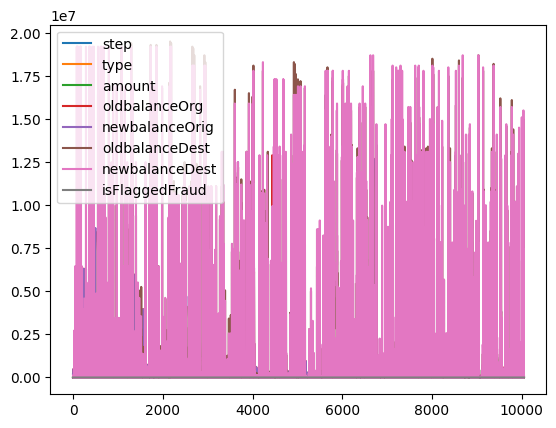

In [12]:
data.plot()

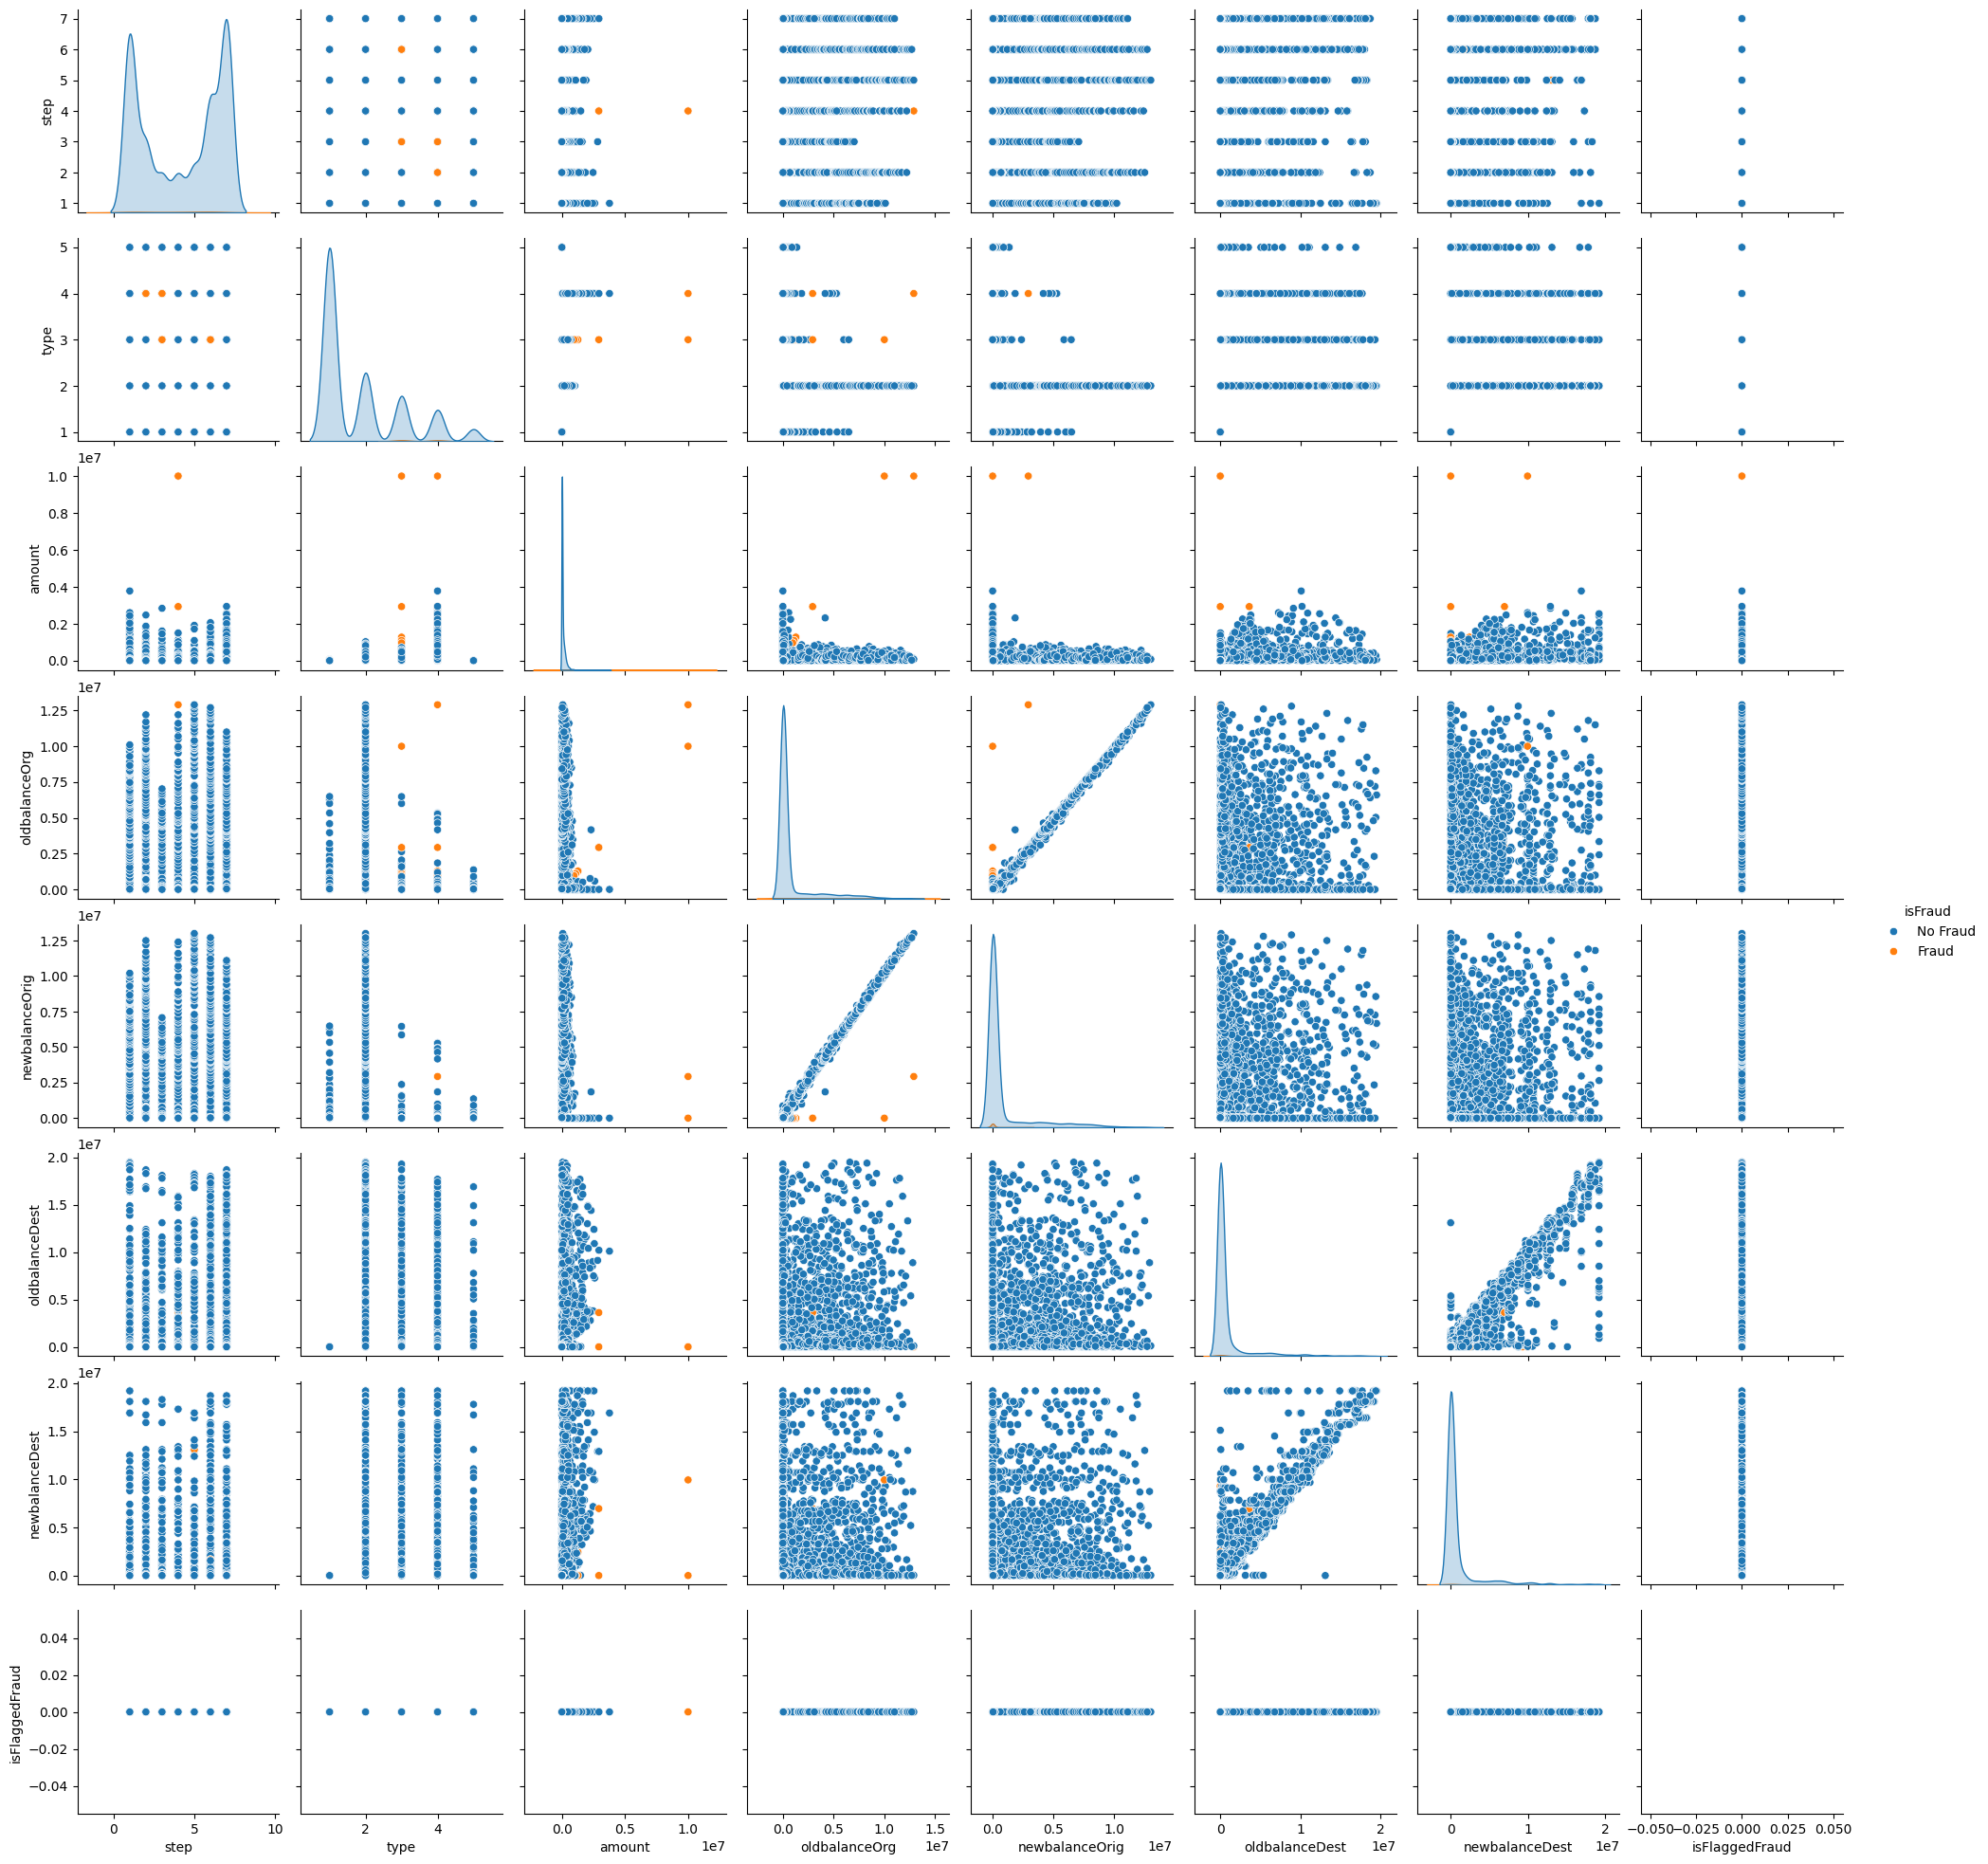

In [13]:
sb.pairplot(data, hue="isFraud")
plt.show()

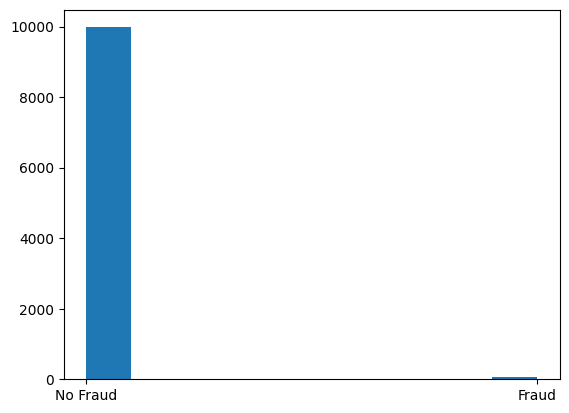

In [14]:
plt.hist(data['isFraud'])
plt.show()

In [15]:
import numpy as np

In [16]:

from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])



In [17]:
print(y)

[['No Fraud']
 ['No Fraud']
 ['Fraud']
 ...
 ['No Fraud']
 ['No Fraud']
 ['No Fraud']]


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [20]:
model=RandomForestClassifier()

In [21]:
model.fit(xtrain,ytrain)

<ipython-input-21-1931a4d49a42>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain,ytrain)


RandomForestClassifier()

In [22]:
ypred=model.predict(xtest)

In [23]:
ypred

array(['No Fraud', 'No Fraud', 'No Fraud', ..., 'No Fraud', 'No Fraud',
       'No Fraud'], dtype=object)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(ytest,ypred)

0.9975124378109452

In [26]:
from sklearn.svm import SVC

In [27]:
model1=SVC()

In [28]:
model1.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [29]:
ypred1=model1.predict(xtest)

In [30]:
ypred1

array(['No Fraud', 'No Fraud', 'No Fraud', ..., 'No Fraud', 'No Fraud',
       'No Fraud'], dtype=object)

In [31]:
accuracy_score(ytest,ypred1)

0.9915422885572139

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model3=KNeighborsClassifier(n_neighbors=7)

In [34]:
model3.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [35]:
ypred3=model3.predict(xtest)

In [36]:
accuracy_score(ytest,ypred3)

0.9935323383084577

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
model4=AdaBoostClassifier(n_estimators=7)

In [39]:
model4.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=7)

In [40]:
ypred4=model4.predict(xtest)

In [41]:
accuracy_score(ytest,ypred4)

0.9915422885572139

In [42]:
 from sklearn.tree import DecisionTreeClassifier

In [43]:
model5=DecisionTreeClassifier()

In [44]:
model5.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [45]:
ypred5=model5.predict(xtest)

In [46]:
accuracy_score(ytest,ypred5)

0.9985074626865672

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model6=LogisticRegression()

In [49]:
model6.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [50]:
ypred6=model6.predict(xtest)

In [51]:
accuracy_score(ytest,ypred6)

0.9746268656716418